机器学习
数据建模在机器学习中具有极其重要的地位。它是机器学习的核心组成部分，对于训练和评估模型、做出预测和优化决策都至关重要。

模型训练和学习：在机器学习中，模型通过从数据中学习模式和关系来进行训练。模型的性能和准确性取决于所用数据的质量和数量。良好的数据建模可以提供高质量的训练数据，有助于构建更准确和可靠的模型。

机器学习的一般框架

1.选择模型： 根据问题的性质，选择适当的机器学习模型。例如，对于分类问题，可以选择支持向量机、决策树、随机森林等。
2.划分数据集： 将数据集分为训练集和测试集，以便评估模型的性能。通常，80%的数据用于训练，20%用于测试。
3.训练模型： 使用训练数据集来拟合模型。
4.评估模型： 使用测试数据集评估模型性能。
5.调优模型： 根据模型性能进行调优，可能需要调整模型超参数、使用交叉验证等。
6.预测： 使用训练好的模型进行新数据的预测。

题目一、以鸢尾花数据集为例学习SVM

SVM 基本概念
支持向量机（support vector machines，SVM）是一种二分类模型，它将实例的特征向量映射为空间中的一些点，SVM 的目的就是想要画出一条线，以 “最好地” 区分这两类点，以至如果以后有了新的点，这条线也能做出很好的分类。SVM 适合中小型数据样本、非线性、高维的分类问题。
SVM 是有监督的学习模型，就是说我们需要先对数据打上标签，之后通过求解最大分类间隔来求解二分类问题，而对于多分类问题，可以组合多个 SVM 分类器来处理。

1.加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分数据集，训练集比例 0.2，随机种子 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2.创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）

In [3]:
from sklearn.svm import SVC

# 创建 SVM 模型，使用线性核函数
svm_model = SVC(kernel='linear', random_state=42)

# 训练模型
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

3.使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

In [4]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

# 预测测试集结果
y_pred = svm_model.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 多分类时使用 'macro'
f1 = f1_score(y_test, y_pred, average='macro')          
conf_matrix = confusion_matrix(y_test, y_pred)

# 打印评估结果
print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy:  1.0
Recall:  1.0
F1 Score:  1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


题目二、以新闻数据分类为例 学习朴素贝叶斯
朴素贝叶斯基本概念
朴素贝叶斯（Naive Bayes）是一种基于贝叶斯定理的统计学分类方法。它被广泛应用于机器学习和数据挖掘领域，特别是在文本分类和垃圾邮件过滤等任务中取得了很好的效果。

1.导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups

In [15]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 导入新闻数据集
newsgroups = fetch_20newsgroups(subset='all', random_state=42)


2.查看类别标签、数据集的描述、数据样本

In [17]:
# 查看类别标签
print("类别标签:", newsgroups.target_names)

# 数据集的描述
print("\n数据集描述:", newsgroups.DESCR)

# 查看前五个数据样本
print("\n前五个数据样本:")
for i in range(5):
    print(f"{i+1}. {newsgroups.data[i]}")


类别标签: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

数据集描述: .. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.fe

3.将文本数据转换为词袋模型

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
# 使用 CountVectorizer 转换为词袋模型
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

4.将数据集分为训练集和测试集，训练集比例0.2，随机种子42

In [19]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5.创建并训练朴素贝叶斯分类器

In [20]:
from sklearn.naive_bayes import MultinomialNB
# 创建并训练朴素贝叶斯分类器
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

6.使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果

In [21]:
# 预测测试集
y_pred = nb_classifier.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')  # 对多分类问题使用 'macro' 平均方式
f1 = f1_score(y_test, y_pred, average='macro')          # 对多分类问题使用 'macro' 平均方式

# 打印评估结果
print("\nAccuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8742705570291777
Recall: 0.8704314810087231
F1 Score: 0.8668669138117396


7.横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

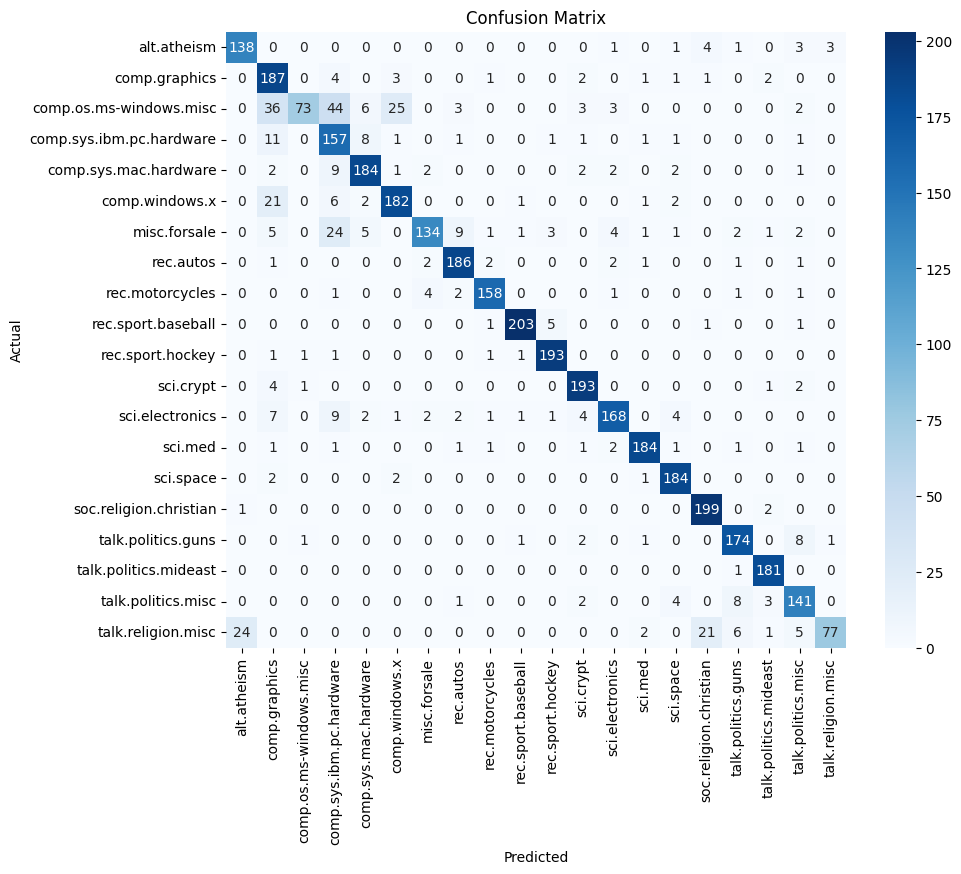

In [22]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

题目三、以鸢尾花数据集为例 学习k-means聚类

聚类分析
聚类是一种无监督学习的方法，旨在将数据集中的样本分组（或簇）成相似的集合，使得同一组内的样本相互之间更相似，而不同组之间的样本更不相似。
聚类是发现数据内在结构的一种方法，它能够帮助我们理解数据的组织、发现隐藏的模式以及从数据中提取有用的信息。

轮廓系数（Silhouette Coefficient） 是一种用于度量数据点与其自身簇内数据的相似度与与最近的相邻簇的数据点的不相似度的指标。
1.对于每个样本，计算它与同簇内所有其他点的平均距离（称为簇内平均距离，a）。
2.对于每个样本，计算它与最近的不同簇内所有点的平均距离（称为簇间平均距离，b）。
3.计算轮廓系数（S）：image
轮廓系数的取值范围在[-1, 1]之间：
 如果 S 接近1，表示样本与自身簇内的其他样本相似度高，与其他簇内的样本不相似，聚类效果好。
 如果 S 接近-1，表示样本与自身簇内的其他样本相似度低，与其他簇内的样本相似度高，聚类效果差。

1.导入数据集和聚类库

In [23]:
from sklearn.datasets import load_iris

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

2.使用k-means聚类，将数据分为3个簇，设置随机种子为0

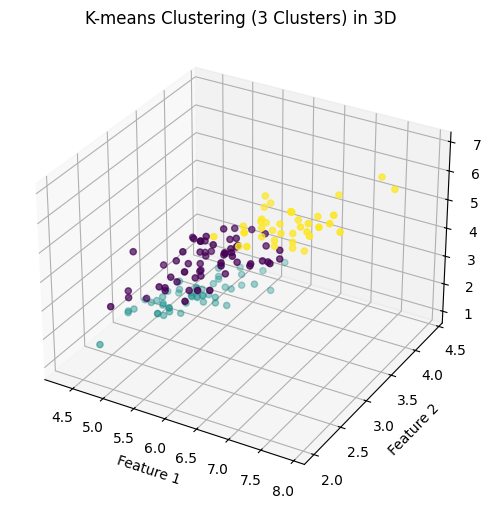

In [24]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# 创建并训练 KMeans 模型
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# 获取聚类结果
y_kmeans = kmeans.predict(X)

# 绘制聚类结果（3D散点图）
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_kmeans, cmap='viridis', marker='o')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-means Clustering (3 Clusters) in 3D')
plt.show()

3.PCA 降维到2维空间后，输出可视化结果

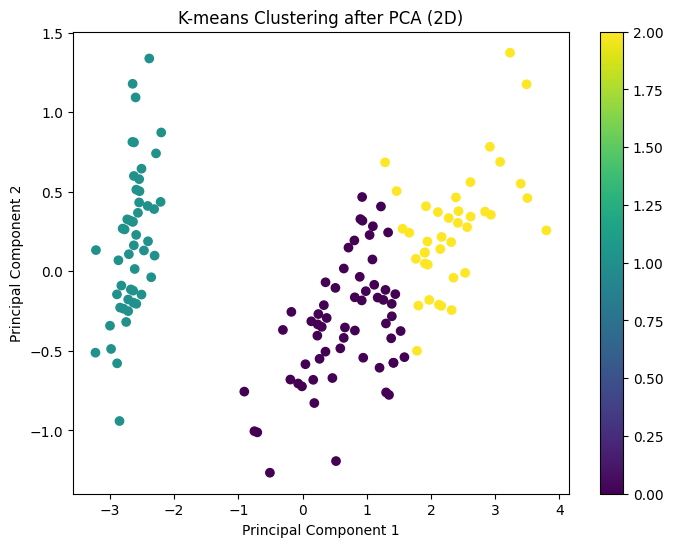

In [25]:
from sklearn.decomposition import PCA
# 使用 PCA 降维到 2 维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 绘制降维后的可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering after PCA (2D)')
plt.colorbar()
plt.show()


4.尝试先降维，再聚类，再输出可视化结果，比较两次的不同

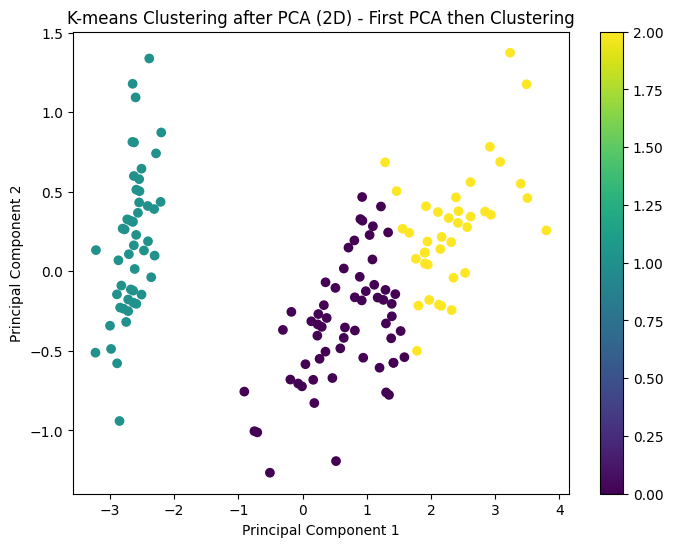

In [26]:
# 先降维到 2 维再进行 K-means 聚类
X_pca_for_clustering = PCA(n_components=2).fit_transform(X)
kmeans_pca = KMeans(n_clusters=3, random_state=0)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca_for_clustering)

# 绘制降维后再聚类的可视化结果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_for_clustering[:, 0], X_pca_for_clustering[:, 1], c=y_kmeans_pca, cmap='viridis', marker='o')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering after PCA (2D) - First PCA then Clustering')
plt.colorbar()
plt.show()

5.使用轮廓系数比较聚类效果

In [27]:
from sklearn.metrics import silhouette_score
# 计算聚类结果的轮廓系数
silhouette_avg = silhouette_score(X, y_kmeans)
silhouette_avg_pca = silhouette_score(X_pca_for_clustering, y_kmeans_pca)

print(f"Silhouette Score (without PCA): {silhouette_avg:.4f}")
print(f"Silhouette Score (with PCA): {silhouette_avg_pca:.4f}")

Silhouette Score (without PCA): 0.5512
Silhouette Score (with PCA): 0.5977


6.绘制轮廓系数与聚类数的关系图

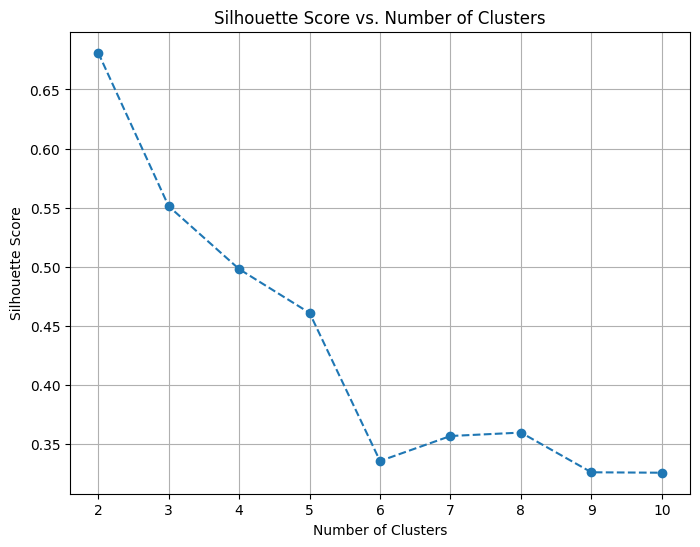

In [28]:
# 计算不同簇数下的轮廓系数
silhouette_scores = []
cluster_range = range(2, 11)  # 尝试不同簇数，2 到 10

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# 绘制轮廓系数与聚类数的关系图
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()